In [1]:
#importing the necessary libraries needed for our program
import matplotlib.pyplot as plt #to plot the directed graph
import networkx as nx #to create the directed graph
import numpy as np #to work with arrays
G = nx.DiGraph() #we initialize the directed graph in variable G

In [7]:
n = int(input("enter the no. of nodes "))
edges = []
for i in range(1,n+1):
    for _ in range(1,int(input("enter the number of outlinks in {} ".format(i)))+1):
        eval("edges.append(({},int(input())))".format(i))

enter the no. of nodes 6
enter the number of outlinks in 1 3
2
3
4
enter the number of outlinks in 2 3
1
3
4
enter the number of outlinks in 3 2
1
4
enter the number of outlinks in 4 3
3
4
5
enter the number of outlinks in 5 3
2
3
4
enter the number of outlinks in 6 1
1


[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 4), (4, 3), (4, 5), (5, 2), (5, 3), (5, 4), (6, 1)]


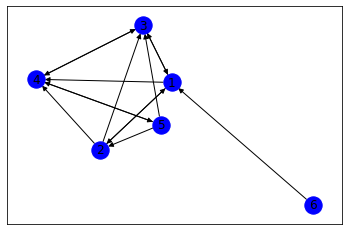

In [21]:
edges1 = edges
for u,v in edges1:
    if u==v:
        edges1.remove((u,v))
print(edges1)
G.add_edges_from(edges1)
nx.draw_networkx(G,with_labels = True, node_color = "blue")

In [74]:
hubValues = np.ones(n,dtype = float)
print(hubValues)
authValues = np.empty(n)

[1. 1. 1. 1. 1. 1.]


In [75]:
def calcAuthority(i):
    pages = list(G.predecessors(i))
    return sum([hubValues[i-1] for i in pages])

In [76]:
def calcHub(i):
    pages = list(G.successors(i))
    return sum([authValues[i-1] for i in pages])

In [77]:
for i in range(1,n+1):
    authValues[i-1] = calcAuthority(i)

In [78]:
print(authValues)

[3. 2. 4. 4. 1. 0.]


In [79]:
#normalisation of authValues
authValues = authValues/sum(authValues)

In [80]:
print(authValues)

[0.21428571 0.14285714 0.28571429 0.28571429 0.07142857 0.        ]


In [81]:
for i in range(1,n+1):
    hubValues[i-1] = calcHub(i)

In [82]:
print(hubValues)

[0.71428571 0.78571429 0.5        0.35714286 0.71428571 0.21428571]


In [83]:
#normalisation of hubValues
hubValues = hubValues/sum(hubValues)

In [84]:
print(hubValues)

[0.2173913  0.23913043 0.15217391 0.10869565 0.2173913  0.06521739]


In [85]:
for _ in range(15):
    for i in range(1,n+1):
        authValues[i-1] = calcAuthority(i)
    authValues = authValues/sum(authValues)
    for j in range(1,n+1):
        hubValues[j-1] = calcHub(j)
    hubValues = hubValues/sum(hubValues)

In [86]:
print(authValues,hubValues,sep = '\n')

[0.15817014 0.17919254 0.3046773  0.31972766 0.03823236 0.        ]
[0.23854488 0.23230446 0.14186215 0.10179143 0.23854488 0.04695221]


In [88]:
import pandas as pd

pd.DataFrame()

In [103]:
d = dict()
d = {"site-name" : [chr(65+i) for i in range(n)],
    "Normalized Hub Score" : hubValues,
    "Normalized Authority Score" : authValues}
df = pd.DataFrame(d)
print(df)

  site-name  Normalized Hub Score  Normalized Authority Score
0         A              0.238545                    0.158170
1         B              0.232304                    0.179193
2         C              0.141862                    0.304677
3         D              0.101791                    0.319728
4         E              0.238545                    0.038232
5         F              0.046952                    0.000000
